# Titanic example (p.m. session)

This notebook contains the code we went through to predict whether someone will survive the Titanic wreck or not.

First, I import the specific libraries I'll need:

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Here I'm importing the data:

In [2]:
df = pd.read_csv('/Users/dsi/datasets/train.csv')
df.head(3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Here I'm checking for missing values:

In [3]:
df.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [4]:
df.shape

(891, 11)

### Average survival rate for people whose ages we have:

In [5]:
df[df['age'].notnull()]['survived'].mean()

0.4061624649859944

### Average survival rate for people whose ages we don't have:

In [6]:
df[df['age'].isnull()]['survived'].mean()

0.2937853107344633

## Data cleaning

Create a new column with a 1 for male passengers and a 0 for female passengers:

In [7]:
df['is_male'] = df['sex'].map(lambda x: 1 if x == 'male' else 0)

Create a dummy column for passengers missing their age:

In [8]:
df['age_missing'] = [int(each) for each in df['age'].isnull()]

Filling missing ages with 0:

In [9]:
df['age'] = df['age'].fillna(0)

Dropping rows where `embarked` is null:

In [10]:
df.dropna(subset=['embarked'], inplace=True)

Dummifying port of embarkment:

In [11]:
df = pd.get_dummies(df, columns=['embarked'])

## Modeling

Now I need to pick the variables I'll use to predict my y, which is whether or not a passenger survived:

In [12]:
df.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'is_male', 'age_missing', 'embarked_C', 'embarked_Q',
       'embarked_S'],
      dtype='object')

Setting up X and y:

In [13]:
X = df.drop(['survived', 'sex', 'name', 'ticket', 'cabin'], axis=1)
y = df['survived']

Scaling my data so it will play nicely with regularization:

In [14]:
ss = StandardScaler()

ss.fit(X)
X_s = ss.transform(X)

Fitting the model:

In [15]:
lr = LogisticRegressionCV()

lr.fit(X, y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

Scoring the model

In [16]:
lr.score(X, y)

0.7986501687289089

Checking against baseline accuracy:

In [17]:
1 - df['survived'].mean()

0.6175478065241844

Coefficients to interpret:

In [18]:
pd.DataFrame({
    'coef': X.columns,
    'val': lr.coef_[0]
})

,coef,val
0,pclass,-1.087692
1,age,-0.039532
2,sibsp,-0.324703
3,parch,-0.106897
4,fare,0.001852
5,is_male,-2.706808
6,age_missing,-1.479504
7,embarked_C,0.451050
8,embarked_Q,0.538165
9,embarked_S,-0.002954


## Visualizations

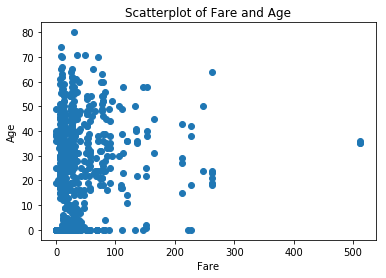

In [19]:
plt.scatter(df['fare'], df['age'])
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Scatterplot of Fare and Age');

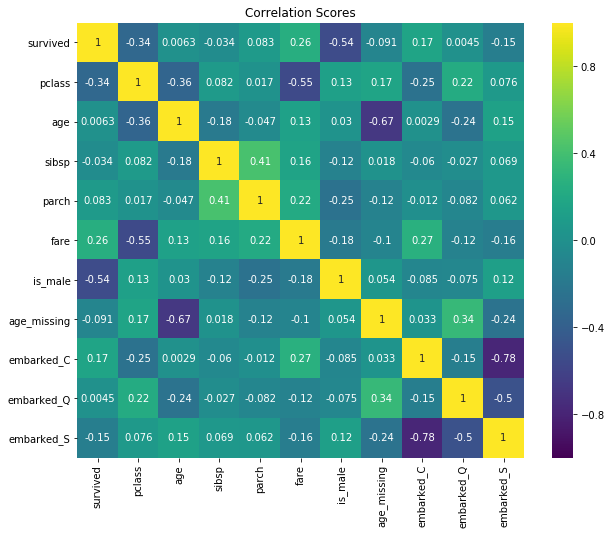

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),
           cmap='viridis',
           vmin=-1,
           annot=True)
plt.title('Correlation Scores');